<a href="https://colab.research.google.com/github/jasonbc94/Data_Science_Projects/blob/main/AirBnB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AirBnB Price Recommendation Project

desired plan:
input: #of bedroom, #of bathroom, (yes/no) superhost, accomodates
output: average price


Include latitude and longitude, and neighborhoods columns in final dataframe

Incorporate linear regression models

add drop down functionality from 4051 week 12 - neighborhood and price

Use tableau to visualize findings

presentation draft

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [ ]:
#import dataset and display information on full dataset
listing_data = pd.read_csv("https://raw.githubusercontent.com/jasonbc94/AirBnBProject/main/listings.csv")

# print(listing_data.shape)
# print(listing_data.info())

In [ ]:
#creation of price dataframe with chosen indepent and dependent variable
price_df= listing_data.filter(['id', 'host_is_superhost','host_neighbourhood','room_type','accommodates','bathrooms_text','beds','price'], axis=1)
#renaming columns
price_df = price_df.rename(columns={'host_neighbourhood': 'neighbourhood','bathrooms_text': 'bathrooms'})
#information on our pricing dataframe
print(price_df.shape)
print(price_df.info())
price_df.head()

(5642, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5642 non-null   int64  
 1   host_is_superhost  5630 non-null   object 
 2   neighbourhood      5201 non-null   object 
 3   room_type          5642 non-null   object 
 4   accommodates       5642 non-null   int64  
 5   bathrooms          5640 non-null   object 
 6   beds               5577 non-null   float64
 7   price              5376 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 352.8+ KB
None


,id,host_is_superhost,neighbourhood,room_type,accommodates,bathrooms,beds,price
0,61878,f,Oak Lawn,Entire home/apt,3,1 bath,2.0,$90.00
1,776810,f,Oak Lawn,Entire home/apt,2,1.5 baths,1.0,$75.00
2,795703,t,Oak Lawn,Entire home/apt,2,1 bath,1.0,$243.00
3,826118,f,North Central Dallas,Private room,2,1 private bath,1.0,$62.00
4,826201,f,North Central Dallas,Private room,2,1 private bath,1.0,$54.00


In [ ]:
price_df["host_is_superhost"] = price_df["host_is_superhost"].replace({"f": 0, "t": 1})

price_df["price"] = price_df["price"].replace('[\$,]', '',regex=True).astype(float)


price_df['bathrooms'] = price_df['bathrooms'].str.extract('(\d*\.?\d*)', expand=False)
price_df['bathrooms'] = price_df['bathrooms'].replace({'':0})
price_df['bathrooms'] = price_df['bathrooms'].astype(float)

print("Average Price/Night: ")
print("$",round(np.mean(price_df['price']),2))



Average Price/Night: 
$ 201.82


In [ ]:
#statistics for variables
price_df.describe()

,id,host_is_superhost,accommodates,bathrooms,beds,price
count,5.642000e+03,5630.000000,5642.000000,5640.000000,5577.000000,5376.000000
mean,5.081006e+17,0.383126,4.936370,1.600177,2.535234,201.819940
std,4.253470e+17,0.486192,3.425924,0.936672,2.042646,589.936528
min,6.187800e+04,0.000000,1.000000,0.000000,1.000000,9.000000
25%,4.679327e+07,0.000000,2.000000,1.000000,1.000000,80.000000
50%,6.738378e+17,0.000000,4.000000,1.000000,2.000000,115.000000
75%,8.980924e+17,1.000000,6.000000,2.000000,3.000000,186.000000
max,1.047857e+18,1.000000,16.000000,14.000000,39.000000,10000.000000


In [ ]:
#value counts of each column
print(price_df["host_is_superhost"].value_counts())
print("")
print(price_df["neighbourhood"].value_counts())
print("")
print(price_df["room_type"].value_counts())
print("")
print(price_df["bathrooms"].value_counts())


print(price_df["accommodates"].value_counts())
print(price_df["beds"].value_counts())

price_df["neighbourhood"].value_counts().to_csv('neighborhood_counts.csv',index=False)

host_is_superhost
0.0    3473
1.0    2157
Name: count, dtype: int64

neighbourhood
Old East Dallas                      781
Oak Lawn                             617
Oak Cliff                            384
Dallas Downtown Historic District    254
Far North Dallas                     200
                                    ... 
Historic Southside                     1
Lower Garden District                  1
Northwest Washington                   1
Arlington Heights                      1
Arcadia Lite                           1
Name: count, Length: 249, dtype: int64

room_type
Entire home/apt    4868
Private room        705
Shared room          69
Name: count, dtype: int64

bathrooms
1.0     3260
2.0     1175
2.5      430
3.0      246
1.5      206
3.5      151
4.0       63
4.5       38
0.0       19
5.0       13
6.0       10
5.5        9
7.0        7
9.0        5
6.5        3
12.5       1
8.0        1
11.5       1
7.5        1
14.0       1
Name: count, dtype: int64
accommodates
2     12

In [ ]:
price_df.head(20)
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5642 non-null   int64  
 1   host_is_superhost  5630 non-null   float64
 2   neighbourhood      5201 non-null   object 
 3   room_type          5642 non-null   object 
 4   accommodates       5642 non-null   int64  
 5   bathrooms          5640 non-null   float64
 6   beds               5577 non-null   float64
 7   price              5376 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 352.8+ KB


In [ ]:


# Group by 'host_is_superhost' and calculate the average price
average_price_by_superhost = price_df.groupby('host_is_superhost')['price'].mean()

# Print the average price for superhost and non-superhost listings
print("Average price for superhost listings:")
print(average_price_by_superhost[1])  # 1 represents superhost
print("\nAverage price for non-superhost listings:")
print(average_price_by_superhost[0])  # 0 represents non-superhost


Average price for superhost listings:
170.66332378223495

Average price for non-superhost listings:
222.00366972477065


In [ ]:

# Filter neighborhoods with counts greater than 20
neighborhood_counts = price_df['neighbourhood'].value_counts()
neighborhoods_gt_20 = neighborhood_counts[neighborhood_counts > 20].index

# Filter the DataFrame to include only neighborhoods with counts greater than 20
df_filtered = price_df[price_df['neighbourhood'].isin(neighborhoods_gt_20)]

# Group by neighborhood and calculate the average price
average_price_by_neighborhood = df_filtered.groupby('neighbourhood')['price'].mean()

# Print the average price for each neighborhood
print("Average price for neighborhoods with more than 20 listings:")
print(average_price_by_neighborhood)


Average price for neighborhoods with more than 20 listings:
neighbourhood
Belmont                              180.258065
Bent Tree                             77.775510
Bishop Arts District                 123.035714
Buckner Terrace / Everglade Park     143.285714
Casa View                            177.590909
Cedar Crest                          210.469136
Cedars                               596.651163
Central Dallas                       164.601562
Cityplace                            157.090909
Clearwater Beach                     314.360000
Dallas Downtown Historic District    130.678862
Design District                      251.440000
Downtown                             114.521212
East Colorado Springs                464.678571
Far North Dallas                     145.407407
Five Points South                    115.833333
Kessler                              161.256757
Knox / Henderson                     195.156863
Lake Highlands                       148.130178
Lakewood Addit

In [ ]:
# Group by accommodates and calculate the average price
average_price_by_accommodates = price_df.groupby('accommodates')['price'].mean()

# Print the average price for each number of accommodations
print("Average price for each number of accommodations:")
print(average_price_by_accommodates)

Average price for each number of accommodations:
accommodates
1      78.996324
2     191.216847
3     123.647975
4     164.953626
5     161.027778
6     226.996845
7     201.174825
8     268.929348
9     307.135135
10    318.377551
11    332.739130
12    323.474820
13    221.000000
14    431.084746
15    448.000000
16    457.627219
Name: price, dtype: float64


In [ ]:
# Group by bathrooms and calculate the average price
average_price_by_bathrooms = price_df.groupby('bathrooms')['price'].mean()

# Print the average price for each number of bathrooms
print("Average price by number of bathrooms:")
print(average_price_by_bathrooms)

Average price by number of bathrooms:
bathrooms
0.0      146.684211
1.0      149.726742
1.5      116.209184
2.0      218.153982
2.5      267.911980
3.0      325.721992
3.5      466.082759
4.0      432.984127
4.5      636.444444
5.0      755.000000
5.5      709.777778
6.0      636.100000
6.5     1121.000000
7.0      976.142857
7.5     1009.000000
8.0      769.000000
9.0     1400.400000
11.5    2653.000000
12.5     125.000000
14.0    2230.000000
Name: price, dtype: float64


In [ ]:
# Group by beds and calculate the average price
average_price_by_beds = price_df.groupby('beds')['price'].mean()

# Print the average price for each number of beds
print("Average price for each number of beds:")
print(average_price_by_beds)


Average price for each number of beds:
beds
1.0      148.677181
2.0      177.263643
3.0      241.739766
4.0      250.965447
5.0      273.786561
6.0      357.355263
7.0      304.455556
8.0      308.969072
9.0      361.568182
10.0     592.413793
11.0     396.285714
12.0     614.625000
13.0    1040.800000
14.0     519.000000
15.0    1200.000000
16.0    2230.000000
17.0     400.000000
22.0     522.000000
39.0     833.000000
Name: price, dtype: float64


In [ ]:
# Group by room_type and calculate the average price
average_price_by_room_type = price_df.groupby('room_type')['price'].mean()

# Print the average price for each type of room
print("Average price for each type of room:")
print(average_price_by_room_type)

Average price for each type of room:
room_type
Entire home/apt    206.258432
Private room       180.951070
Shared room         97.149254
Name: price, dtype: float64


In [ ]:
#def apply_filters(superhost,neighbourhood,room_type,accommodates,bathrooms,beds,price)


In [ ]:
# Function to get input from the user and return the average price based on property info in the dataset
def get_average_price():
    # Get user inputs
    num_beds = int(input("Enter number of beds: "))
    num_baths = float(input("Enter number of bathrooms: "))
    superhost = input("Is the host a superhost? Enter yes or no: ").lower()
    superhost_status = 1 if superhost == 'yes' else 0
    accommodates = int(input("Enter number of accommodations: "))

    # Filter the dataframe based on user inputs
    filtered_df = price_df[
        (price_df['beds'] == num_beds) &
        (price_df['bathrooms'] == num_baths) &
        (price_df['host_is_superhost'] == superhost_status) &
        (price_df['accommodates'] == accommodates)
    ]

    # Calculate and print the average price
    if not filtered_df.empty:
        average_price = filtered_df['price'].mean()
        print(f"Average price for specified inputs: ${average_price:.2f}")
    else:
        print("No listings match the specified inputs. Please try different values.")

# Call the function to start the process
get_average_price()

##get exact numbers from the dataset as an example


Enter number of beds: 2
Enter number of bathrooms: 2
Is the host a superhost? Enter yes or no: yes
Enter number of accommodations: 4
Average price for specified inputs: $159.95


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# # Drop rows where any of the columns in subset have NaN values
# X = X.dropna(subset=['beds', 'bathrooms', 'host_is_superhost', 'accommodates'])
# y = price_df.loc[X.index, 'price']  # Ensure y corresponds to the filtered X

# # Define features and target variable
# X = price_df[['beds', 'bathrooms', 'host_is_superhost', 'accommodates']]
# y = price_df['price']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

price_df=price_df.dropna()
X_train, X_test, y_train, y_test = train_test_split(
    price_df.drop({'price','neighbourhood','room_type'}, axis=1),
    price_df['price'],
    test_size=0.25,
    random_state=42)

X_train['beds'] = X_train['beds'].fillna(round(X_train['beds'].mean(), 1))
X_train['host_is_superhost'] = X_train['host_is_superhost'].fillna(X_train['host_is_superhost'].mode()[0])


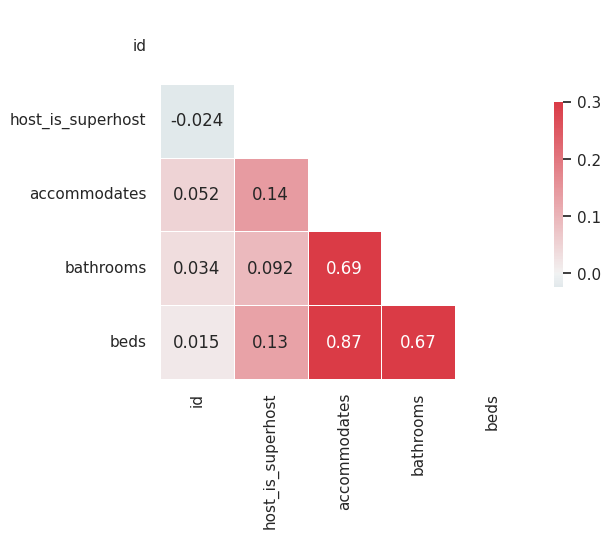

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots()

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);


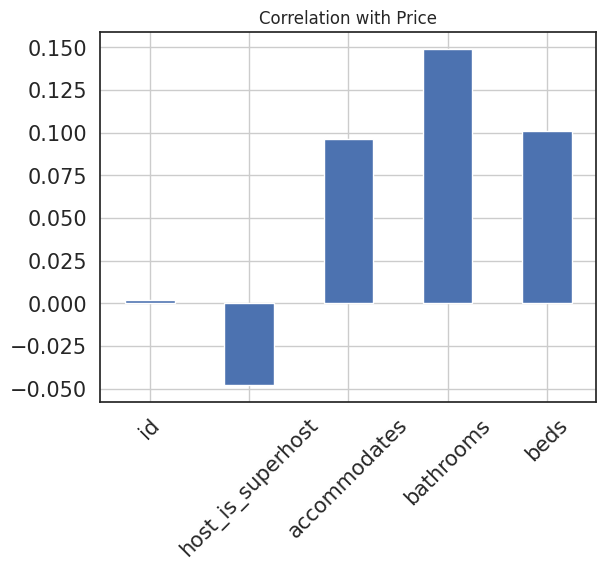

In [ ]:

# showing correlation of multiple features with one target
X_train.corrwith(y_train).plot.bar(
        title = "Correlation with Price", fontsize = 15,
        rot = 45, grid = True);

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy to fill missing values
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, X_train_imputed and X_test_imputed do not contain any NaNs and can be used to train and test the model
model = LinearRegression()
model.fit(X_train, y_train)


# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices on the testing set
y_pred = model.predict(X_test)

# Calculate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Model MSE: {mse}")

Model MSE: 346443.0981487207


In [ ]:
def predict_price(beds, bathrooms, superhost, accommodates):
    # Convert superhost from 'yes'/'no' to 1/0
    superhost_status = 1 if superhost.lower() == 'yes' else 0
    # Predict price using the trained model
    predicted_price = model.predict([[beds, bathrooms, superhost_status, accommodates]])
    return predicted_price[0]


beds = int(input("Enter number of beds: "))
bathrooms = float(input("Enter number of bathrooms: "))
superhost = input("Is the host a superhost? (yes/no): ")
accommodates = int(input("Enter number of accommodations: "))
estimated_price = predict_price(beds, bathrooms, superhost, accommodates)
print(f"Estimated price: ${estimated_price:.2f}")

Enter number of beds: 1
Enter number of bathrooms: 1
Is the host a superhost? (yes/no): yes
Enter number of accommodations: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but LinearRegression is expecting 5 features as input.